In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [34]:
train_df = pd.read_csv("train.csv", usecols=["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [70]:
train_df["InCabin"] = train_df.apply(lambda x: 1 if type(x["Cabin"]) == str else 0, axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,InCabin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,1
888,0,3,female,NaN,1,2,23.4500,NaN,S,0
889,1,1,male,26.0,0,0,30.0000,C148,C,1


In [73]:
train_df["CabinArea"] = train_df.apply(lambda x: x["Cabin"][0] if type(x["Cabin"]) == str else "N", axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,InCabin,CabinArea
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,N
1,1,1,female,38.0,1,0,71.2833,C85,C,1,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,N
3,1,1,female,35.0,1,0,53.1000,C123,S,1,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,N
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0,N
887,1,1,female,19.0,0,0,30.0000,B42,S,1,B
888,0,3,female,NaN,1,2,23.4500,NaN,S,0,N
889,1,1,male,26.0,0,0,30.0000,C148,C,1,C


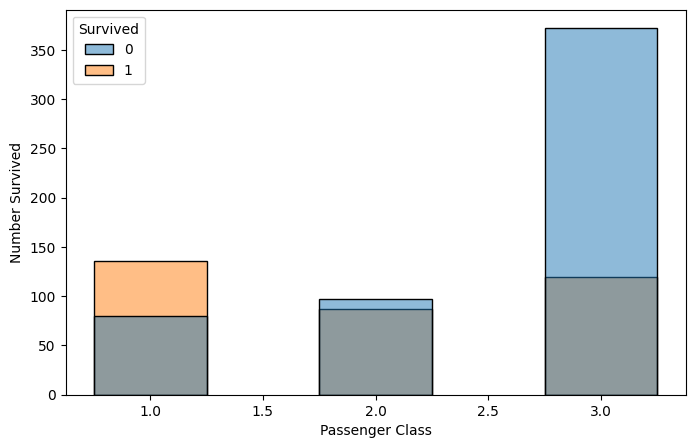

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Pclass", ax=ax, hue="Survived", bins=3, binrange=[0.5, 3.5], shrink=0.5)
ax.set(xlabel="Passenger Class", ylabel="Number Survived")
plt.show()

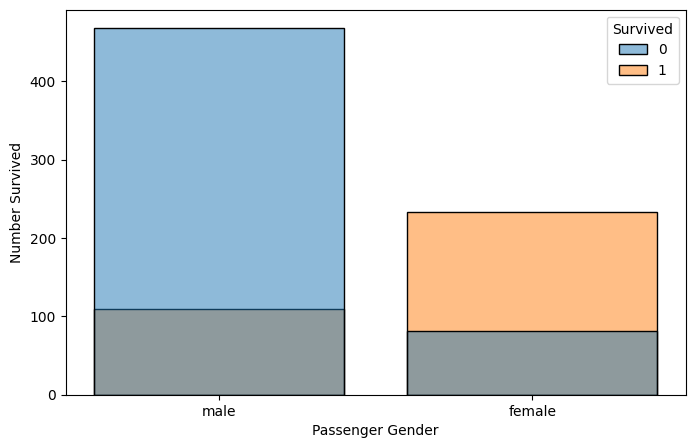

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Sex", ax=ax, hue="Survived", shrink=0.8)
ax.set(xlabel="Passenger Gender", ylabel="Number Survived")
plt.show()

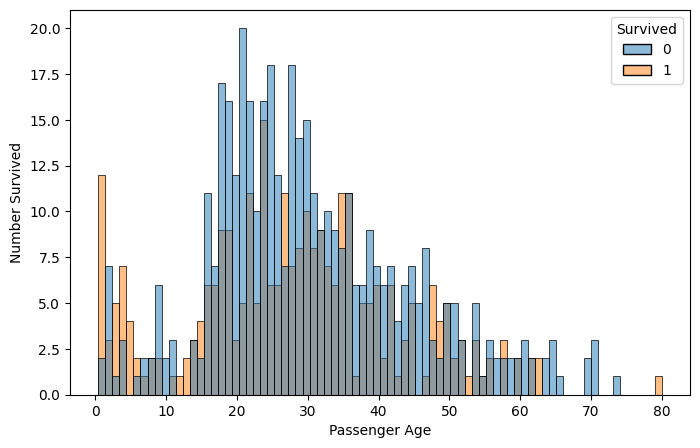

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Age", ax=ax, hue="Survived", bins=80)
ax.set(xlabel="Passenger Age", ylabel="Number Survived")
plt.show()

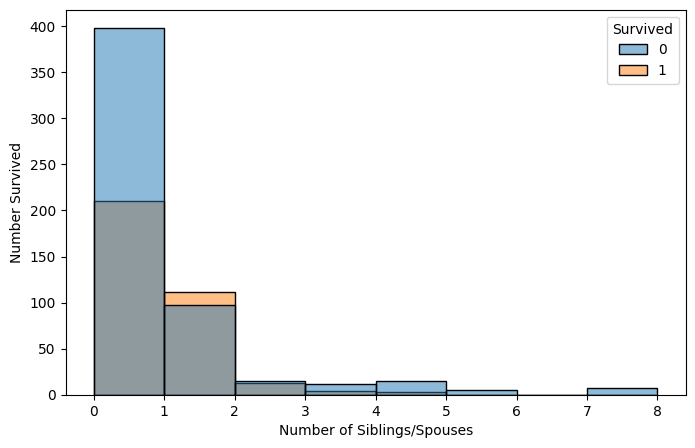

In [46]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="SibSp", ax=ax, hue="Survived", bins=8)
ax.set(xlabel="Number of Siblings/Spouses", ylabel="Number Survived")
plt.show()

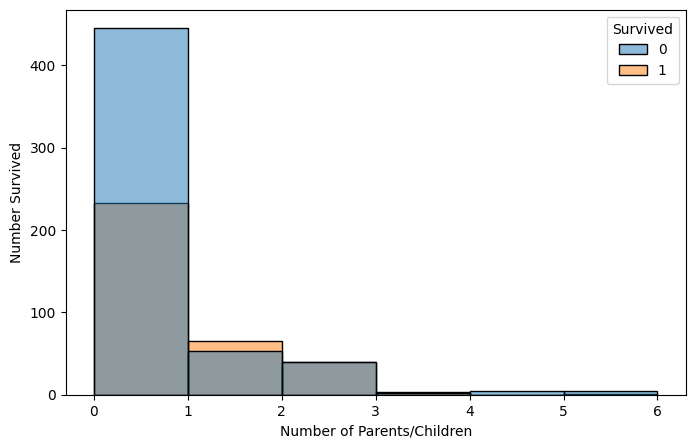

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Parch", ax=ax, hue="Survived", bins=6)
ax.set(xlabel="Number of Parents/Children", ylabel="Number Survived")
plt.show()

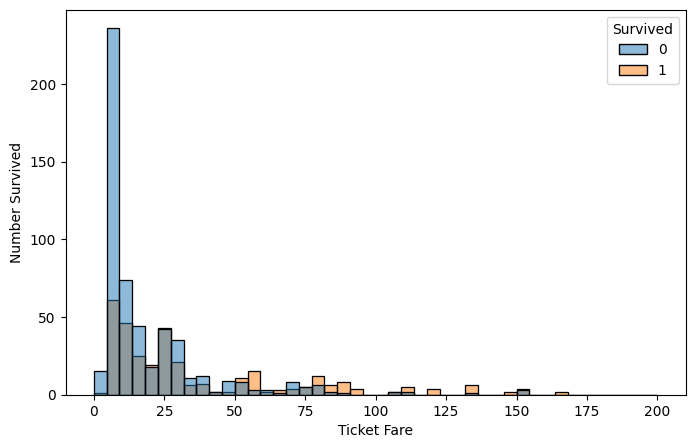

In [50]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Fare", ax=ax, hue="Survived", binrange=[0, 200])
ax.set(xlabel="Ticket Fare", ylabel="Number Survived")
plt.show()

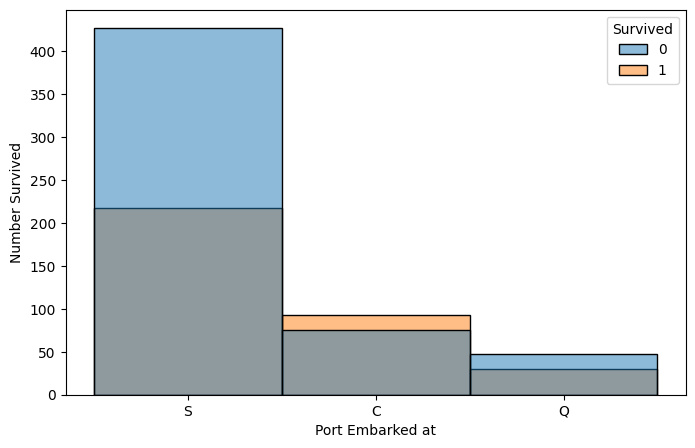

In [51]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="Embarked", ax=ax, hue="Survived")
ax.set(xlabel="Port Embarked at", ylabel="Number Survived")
plt.show()

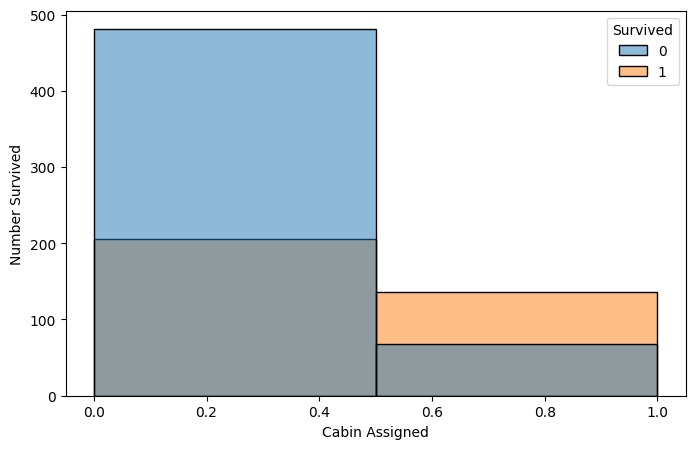

In [72]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="InCabin", ax=ax, hue="Survived", bins=2)
ax.set(xlabel="Cabin Assigned", ylabel="Number Survived")
plt.show()

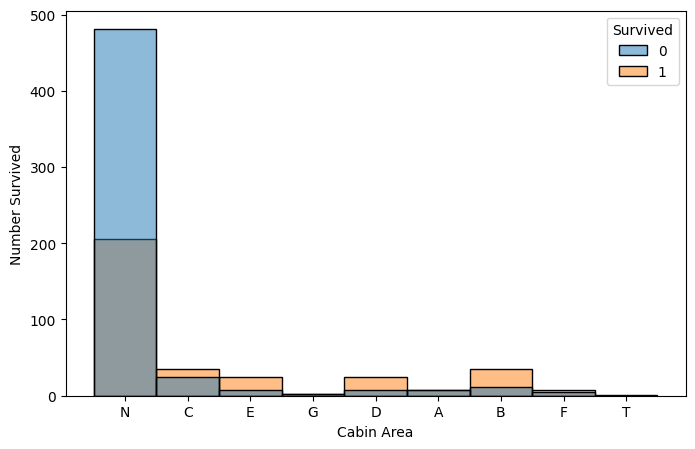

In [75]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data=train_df, x="CabinArea", ax=ax, hue="Survived")
ax.set(xlabel="Cabin Area", ylabel="Number Survived")
plt.show()